# Introduction

In this notebook, we will perform an exploratory data analysis (EDA) on a combat dataset created by Manuel Cota. This work is aimed at classifying the difficulty of battles between the parties of heroes and the monsters in Dungeons & Dragons (D&D).

The dataset includes detailed information on the heroes and monsters involved in each encounter:

- **Heroes Data:**  
  Each hero is described by a block of 10 columns, which include the hero's class, level, and various attributes such as HP, AC, and ability scores (STR, DEX, CON, INT, WIS, CHA).
  
- **Monsters Data:**  
  The data for monsters is organized into blocks as well, with each monster having a name, a challenge rating (`cr`), and a set of attributes similar to the heroes. In our dataset, there are up to three monsters per encounter.

- **Encounter Metrics:**  
  Additional columns such as `not_conscious_players_ratio`, `party_hp_ratio`, and `difficulty` offer further insights into the state of the encounter.

Throughout this analysis, we will explore various aspects of the data, including distribution of attributes, relationships between party composition and encounter outcome, and the overall difficulty of battles. The insights derived from this EDA will help us understand the factors that contribute to encounter difficulty in D&D.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from scipy.stats import shapiro

In [2]:
FORESIGHT_DIRECTORY = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

DATA_INTERIM_DIRECTORY = os.path.join(FORESIGHT_DIRECTORY, "data", "interim")

# Nombre de archivo
DATA_FILENAME = "combat_results.csv"

# Rutas completas
FILE_PATH = os.path.join(DATA_INTERIM_DIRECTORY, DATA_FILENAME)

In [3]:
def shapiro_test(df: pd.DataFrame, numeric_attrs: list, column: str):
    shapiro_results = []
    max_sample = 5000

    for attr in numeric_attrs:
        for level_value in df[column].dropna().unique():
            group_values = df[df[column] == level_value][attr].dropna()

            # Limita la muestra si es necesario
            if len(group_values) > max_sample:
                group_values = group_values.sample(n=max_sample, random_state=42)

            if 3 <= len(group_values) <= max_sample:
                stat, p = shapiro(group_values.to_numpy())
                normal = p > 0.05
            else:
                stat, p, normal = None, None, None
            
            shapiro_results.append({
                "attribute": attr,
                column: level_value,
                "n": len(group_values),
                "shapiro_stat": stat,
                "p_value": p,
                "normal": bool(normal) if normal is not None else None
            })

    return pd.DataFrame(shapiro_results)

In [4]:
df = pd.read_csv(FILE_PATH)


In [6]:
df.head().iloc[:,60:]

,pc7_class,pc7_level,pc7_hp_max,pc7_ac,pc7_STR,pc7_DEX,pc7_CON,pc7_INT,pc7_WIS,pc7_CHA,...,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty,num_players
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,monsters,1.0,0.000000,9,5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,monsters,1.0,0.000000,9,5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,monsters,1.0,-0.186441,9,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,monsters,1.0,0.000000,9,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,monsters,1.0,0.000000,9,5


## A Bit of Exploratory Analysis

In this section, we will conduct a preliminary exploration of the dataset to understand its structure and identify key trends. Our exploratory analysis will include:

- **Data Structure:**  
  Reviewing the overall dimensions of the dataset, data types, and sample rows to get an initial sense of the data format.

- **Distribution of Key Variables:**  
  Visualizing the distribution of important variables such as `num_players` (the number of heroes in each party) and the encounter outcome (`winner`), which indicates whether the party or monsters won.

- **Attribute Distributions:**  
  Analyzing the distribution of hero attributes (e.g., HP, AC, STR, DEX, CON, INT, WIS, CHA) and monster challenge ratings (CR) to understand variability and central tendencies in the data.

- **Correlation Analysis:**  
  Examining relationships between additional metrics like `party_hp_ratio`, `not_conscious_players_ratio`, and `difficulty` to identify factors that might influence encounter outcomes.

This exploratory analysis aims to highlight underlying patterns, detect potential data quality issues, and generate hypotheses for further investigation and modeling.


In [7]:
# 1. Basic DataFrame Information
num_rows, num_cols = df.shape
print("CSV File Basic Information:")
print(f"  - Number of rows: {num_rows}")
print(f"  - Number of columns: {num_cols}")
print("  - Column names:", df.columns)
print("  - Data types:", df.dtypes)
print("\n")

CSV File Basic Information:
  - Number of rows: 400000
  - Number of columns: 145
  - Column names: Index(['pc1_class', 'pc1_level', 'pc1_hp_max', 'pc1_ac', 'pc1_STR', 'pc1_DEX',
       'pc1_CON', 'pc1_INT', 'pc1_WIS', 'pc1_CHA',
       ...
       'monster7_DEX', 'monster7_CON', 'monster7_INT', 'monster7_WIS',
       'monster7_CHA', 'winner', 'not_conscious_players_ratio',
       'party_hp_ratio', 'difficulty', 'num_players'],
      dtype='object', length=145)
  - Data types: pc1_class                       object
pc1_level                        int64
pc1_hp_max                       int64
pc1_ac                           int64
pc1_STR                          int64
                                ...   
winner                          object
not_conscious_players_ratio    float64
party_hp_ratio                 float64
difficulty                       int64
num_players                      int64
Length: 145, dtype: object




In [8]:
# 2. Show the first and last few rows
print("First 5 rows of the dataset:")
print(df.head(5))
print("\n")
print("Last 5 rows of the dataset:")
print(df.tail(5))
print("\n")

First 5 rows of the dataset:
  pc1_class  pc1_level  pc1_hp_max  pc1_ac  pc1_STR  pc1_DEX  pc1_CON  \
0      Bard          3          24      11       -1        0        1   
1      Bard          3          31      13        0        2        4   
2      Bard          3           9      10       -1       -1       -1   
3      Bard          3           9      14        3        3       -1   
4      Bard          3          15      13        0        2        0   

   pc1_INT  pc1_WIS  pc1_CHA  ... monster7_DEX  monster7_CON  monster7_INT  \
0       -1       -1        2  ...          NaN           NaN           NaN   
1       -1        0        4  ...          NaN           NaN           NaN   
2        3        0        3  ...          NaN           NaN           NaN   
3        1        0        4  ...          NaN           NaN           NaN   
4        3        0        3  ...          NaN           NaN           NaN   

   monster7_WIS  monster7_CHA    winner  not_conscious_players_

In [9]:
# 3. Descriptive Statistics for numeric columns
print("Descriptive Statistics for Numeric Columns:")
summary = df.describe()
print(summary)
print("\n")

Descriptive Statistics for Numeric Columns:
           pc1_level     pc1_hp_max         pc1_ac        pc1_STR  \
count  400000.000000  400000.000000  400000.000000  400000.000000   
mean        3.008325      27.356848      11.831138       2.890353   
std         1.416602      14.050589       1.886994       1.843167   
min         1.000000       7.000000       8.000000      -1.000000   
25%         2.000000      15.000000      10.000000       2.000000   
50%         3.000000      25.000000      12.000000       3.000000   
75%         4.000000      37.000000      13.000000       4.000000   
max         5.000000      85.000000      19.000000       5.000000   

             pc1_DEX        pc1_CON        pc1_INT        pc1_WIS  \
count  400000.000000  400000.000000  400000.000000  400000.000000   
mean        0.628880       2.036610       0.628435       0.631498   
std         1.339238       1.469321       1.337974       1.340277   
min        -1.000000      -1.000000      -1.000000      -1

In [10]:
def count_missing(df: pd.DataFrame):
    missing_info = df.isnull().sum().to_dict()
    return missing_info

missing_counts = count_missing(df)
print("Missing Values Count per Column:")
for col, count in missing_counts.items():
    print(f"  - {col}: {count}")

print("\n")

Missing Values Count per Column:
  - pc1_class: 0
  - pc1_level: 0
  - pc1_hp_max: 0
  - pc1_ac: 0
  - pc1_STR: 0
  - pc1_DEX: 0
  - pc1_CON: 0
  - pc1_INT: 0
  - pc1_WIS: 0
  - pc1_CHA: 0
  - pc2_class: 55560
  - pc2_level: 55560
  - pc2_hp_max: 55560
  - pc2_ac: 55560
  - pc2_STR: 55560
  - pc2_DEX: 55560
  - pc2_CON: 55560
  - pc2_INT: 55560
  - pc2_WIS: 55560
  - pc2_CHA: 55560
  - pc3_class: 113880
  - pc3_level: 113880
  - pc3_hp_max: 113880
  - pc3_ac: 113880
  - pc3_STR: 113880
  - pc3_DEX: 113880
  - pc3_CON: 113880
  - pc3_INT: 113880
  - pc3_WIS: 113880
  - pc3_CHA: 113880
  - pc4_class: 172640
  - pc4_level: 172640
  - pc4_hp_max: 172640
  - pc4_ac: 172640
  - pc4_STR: 172640
  - pc4_DEX: 172640
  - pc4_CON: 172640
  - pc4_INT: 172640
  - pc4_WIS: 172640
  - pc4_CHA: 172640
  - pc5_class: 229770
  - pc5_level: 229770
  - pc5_hp_max: 229770
  - pc5_ac: 229770
  - pc5_STR: 229770
  - pc5_DEX: 229770
  - pc5_CON: 229770
  - pc5_INT: 229770
  - pc5_WIS: 229770
  - pc5_CHA: 2297

In [13]:
new_column_names = ["class", "level", "hp", "ac", "STR", "DEX", "CON", "INT", "WIS", "CHA"]

# Tipos esperados por cada columna
expected_dtypes = {
    "class": "string",
    "level": "Int64",  # Nullable integer
    "hp": "Int64",
    "ac": "Int64",
    "STR": "Int64",
    "DEX": "Int64",
    "CON": "Int64",
    "INT": "Int64",
    "WIS": "Int64",
    "CHA": "Int64",
}

first_70_columns = df.columns[:70]
groups = []

for i in range(0, 70, 10):
    group = df[first_70_columns[i:i+10]].drop_duplicates()
    rename_dict = dict(zip(group.columns, new_column_names))
    group = group.rename(columns=rename_dict)
    
    # Asegurar tipos
    for col, dtype in expected_dtypes.items():
        if col in group.columns:
            group[col] = group[col].astype(dtype)
    
    groups.append(group)

# Concatenar los grupos
result_df = pd.concat(groups, axis=0, ignore_index=True)

# Limpiar nulos y duplicados
heros_df = result_df.dropna().drop_duplicates()

In [14]:
import pandas as pd

# 5. Dado que el archivo es muy pesado, se toma una muestra de filas para visualización
sample_size = 5000  # Ajusta el tamaño de la muestra según sea necesario
df_sample_pd = df.sample(n=sample_size, random_state=42)  # Sample directamente en Pandas

# 6. Identificar columnas numéricas y categóricas (heurística basada en los dtypes de pandas)
num_cols_list = [col for col in df_sample_pd.columns 
                 if pd.api.types.is_numeric_dtype(df_sample_pd[col])]
cat_cols_list = [col for col in df_sample_pd.columns if col not in num_cols_list]

print("Numeric columns:", num_cols_list)
print("Categorical columns:", cat_cols_list)
print("\n")


Numeric columns: ['pc1_level', 'pc1_hp_max', 'pc1_ac', 'pc1_STR', 'pc1_DEX', 'pc1_CON', 'pc1_INT', 'pc1_WIS', 'pc1_CHA', 'pc2_level', 'pc2_hp_max', 'pc2_ac', 'pc2_STR', 'pc2_DEX', 'pc2_CON', 'pc2_INT', 'pc2_WIS', 'pc2_CHA', 'pc3_level', 'pc3_hp_max', 'pc3_ac', 'pc3_STR', 'pc3_DEX', 'pc3_CON', 'pc3_INT', 'pc3_WIS', 'pc3_CHA', 'pc4_level', 'pc4_hp_max', 'pc4_ac', 'pc4_STR', 'pc4_DEX', 'pc4_CON', 'pc4_INT', 'pc4_WIS', 'pc4_CHA', 'pc5_level', 'pc5_hp_max', 'pc5_ac', 'pc5_STR', 'pc5_DEX', 'pc5_CON', 'pc5_INT', 'pc5_WIS', 'pc5_CHA', 'pc6_level', 'pc6_hp_max', 'pc6_ac', 'pc6_STR', 'pc6_DEX', 'pc6_CON', 'pc6_INT', 'pc6_WIS', 'pc6_CHA', 'pc7_level', 'pc7_hp_max', 'pc7_ac', 'pc7_STR', 'pc7_DEX', 'pc7_CON', 'pc7_INT', 'pc7_WIS', 'pc7_CHA', 'monster1_cr', 'monster1_hp_max', 'monster1_ac', 'monster1_STR', 'monster1_DEX', 'monster1_CON', 'monster1_INT', 'monster1_WIS', 'monster1_CHA', 'monster2_cr', 'monster2_hp_max', 'monster2_ac', 'monster2_STR', 'monster2_DEX', 'monster2_CON', 'monster2_INT', 'mo

In [15]:
# Definir los nuevos nombres de columna
new_column_names = ["class", "cr", "hp", "ac", "STR", "DEX", "CON", "INT", "WIS", "CHA"]

# Obtener las columnas de monstruos: columnas 70 a 100 (30 columnas)
monster_columns = df.columns[70:100]

# Dividir estas 30 columnas en grupos de 10
groups = []

# Iterar sobre los grupos de 10 columnas
for i in range(0, len(monster_columns), 10):
    # Seleccionar el grupo
    group = df[monster_columns[i:i+10]].drop_duplicates()

    # Renombrar las columnas
    rename_dict = dict(zip(group.columns, new_column_names))
    group = group.rename(columns=rename_dict)
    
    groups.append(group)

# Concatenar los grupos verticalmente
result_df = pd.concat(groups, axis=0, ignore_index=True)

# Opcionalmente eliminar filas con valores nulos
monsters_df = result_df.dropna()

# Eliminar duplicados
monsters_df = monsters_df.drop_duplicates()


In [16]:
# 1. Resumen estadístico para columnas numéricas
print("\nStatistical Summary:")
print(heros_df.describe())

# 2. Calcular el promedio de atributos por combinación de clase y nivel
agg_stats = (
    heros_df
    .groupby(["class", "level"], as_index=False)
    .agg({
        "hp": "mean",
        "ac": "mean",
        "STR": "mean",
        "DEX": "mean",
        "CON": "mean",
        "INT": "mean",
        "WIS": "mean",
        "CHA": "mean"
    })
)

# Renombrar columnas para claridad
agg_stats = agg_stats.rename(columns={
    "hp": "hp_mean",
    "ac": "ac_mean",
    "STR": "STR_mean",
    "DEX": "DEX_mean",
    "CON": "CON_mean",
    "INT": "INT_mean",
    "WIS": "WIS_mean",
    "CHA": "CHA_mean"
})

print("\nAverage Attributes per Class and Level:")
print(agg_stats.sort_values(by=["class", "level"]))



Statistical Summary:
          level         hp         ac       STR       DEX       CON       INT  \
count  606232.0   606232.0   606232.0  606232.0  606232.0  606232.0  606232.0   
mean   3.554652  30.784244  12.125203  2.722741   0.84111  2.047104  0.843235   
std    1.165021  13.962125   1.973683  1.999766   1.45014  1.665286  1.450567   
min         1.0        7.0        8.0      -1.0      -1.0      -1.0      -1.0   
25%         3.0       20.0       11.0       1.0       0.0       1.0       0.0   
50%         4.0       28.0       12.0       3.0       1.0       2.0       1.0   
75%         5.0       40.0       13.0       5.0       2.0       3.0       2.0   
max         5.0       85.0       19.0       5.0       5.0       5.0       5.0   

            WIS       CHA  
count  606232.0  606232.0  
mean   0.843037  2.241823  
std     1.45105  2.077516  
min        -1.0      -1.0  
25%         0.0       0.0  
50%         1.0       2.0  
75%         2.0       4.0  
max         5.0       5.

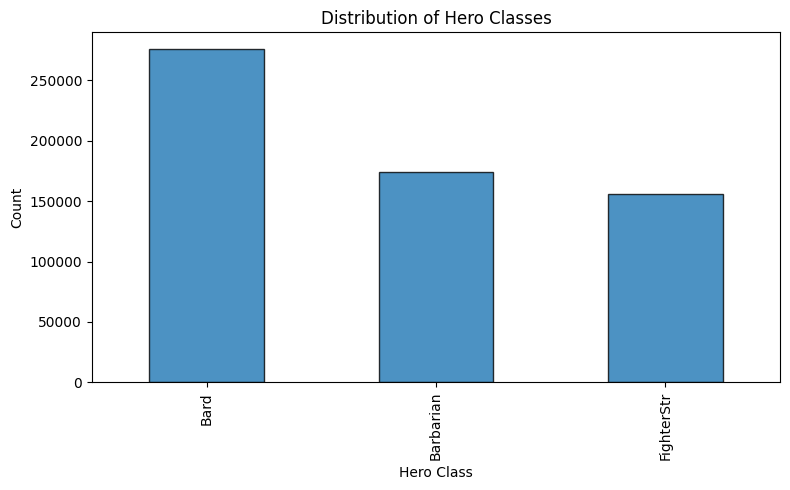

In [17]:
# 5.A. Distribution of Hero Classes
plt.figure(figsize=(8, 5))
class_counts = heros_df["class"].value_counts()
class_counts.plot(kind="bar", edgecolor='black', alpha=0.8)
plt.title("Distribution of Hero Classes")
plt.xlabel("Hero Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

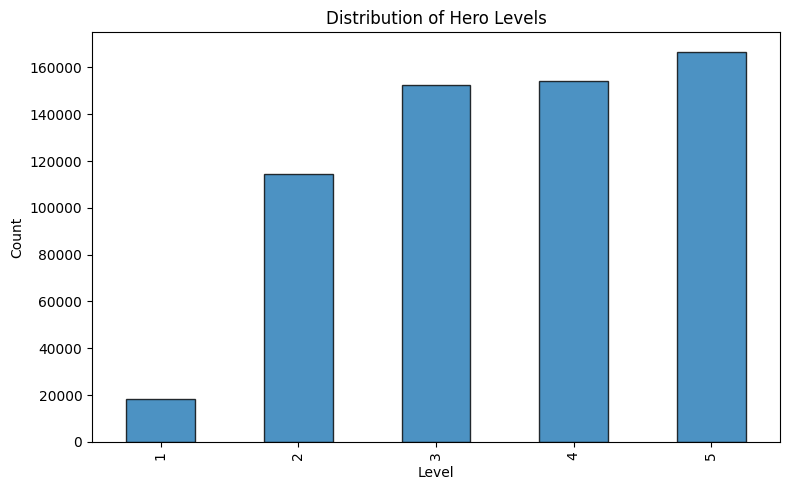

In [18]:
plt.figure(figsize=(8, 5))
level_counts = heros_df["level"].value_counts().sort_index()
level_counts.plot(kind="bar", edgecolor='black', alpha=0.8)
plt.title("Distribution of Hero Levels")
plt.xlabel("Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


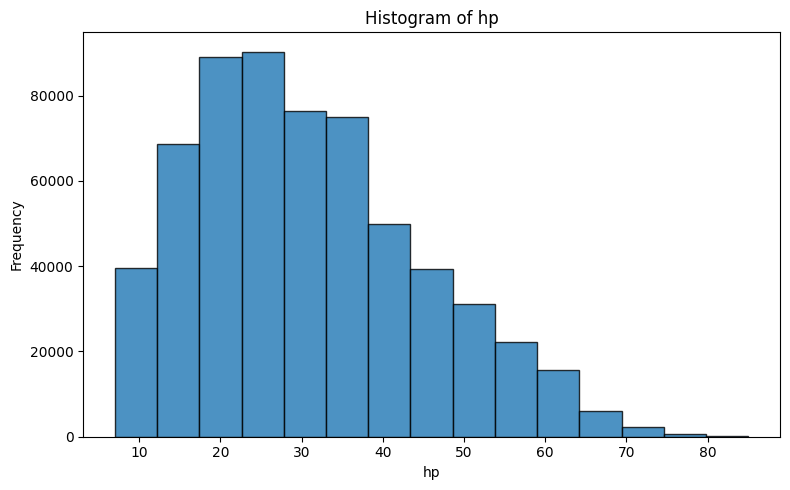

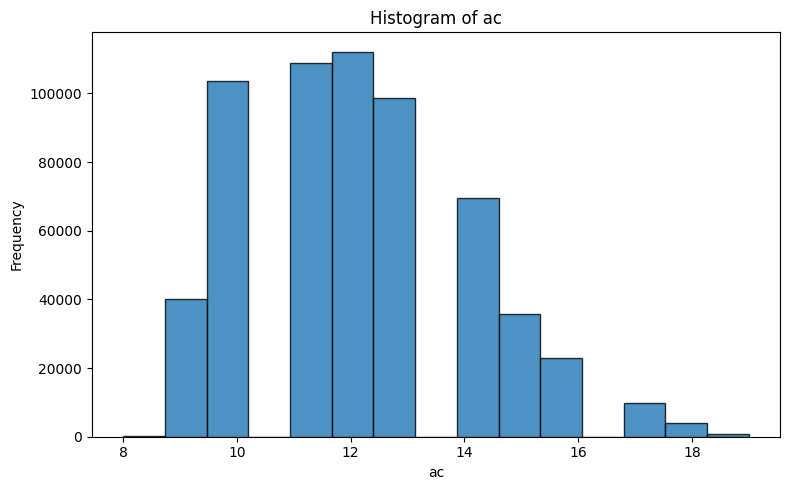

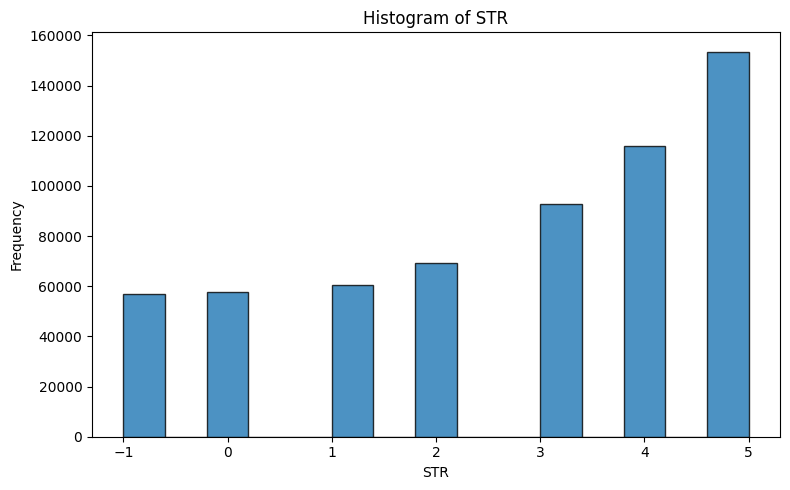

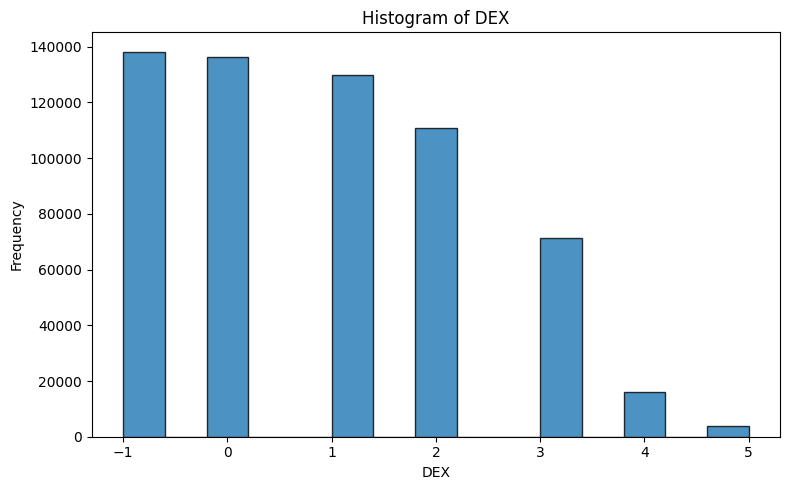

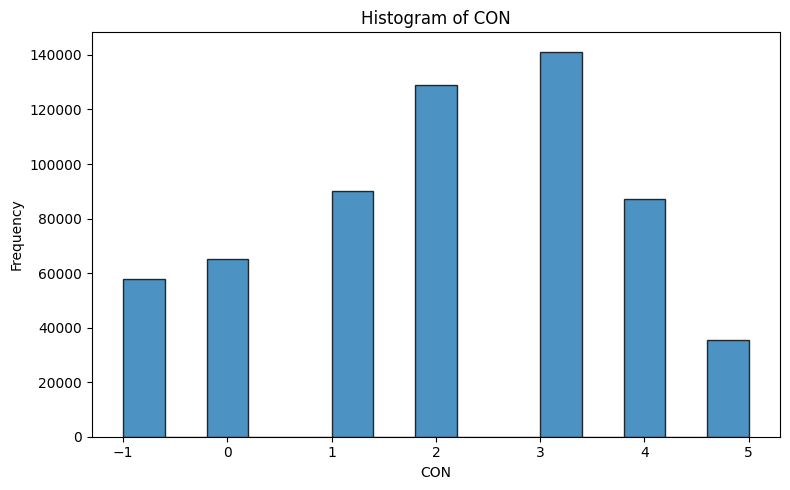

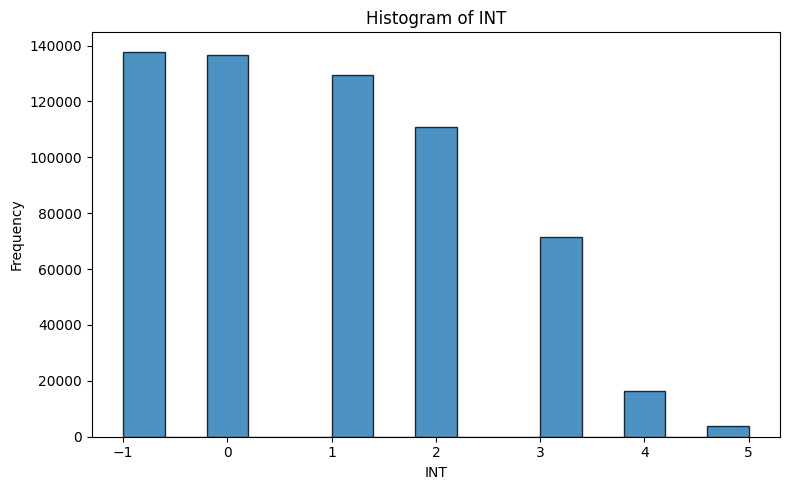

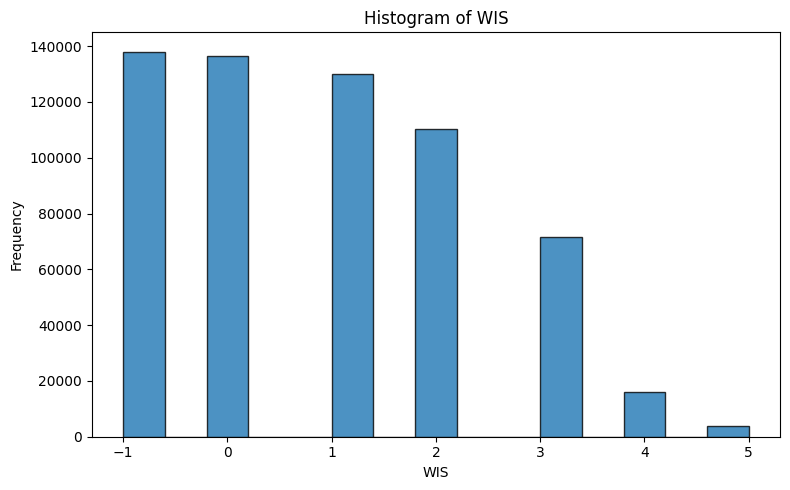

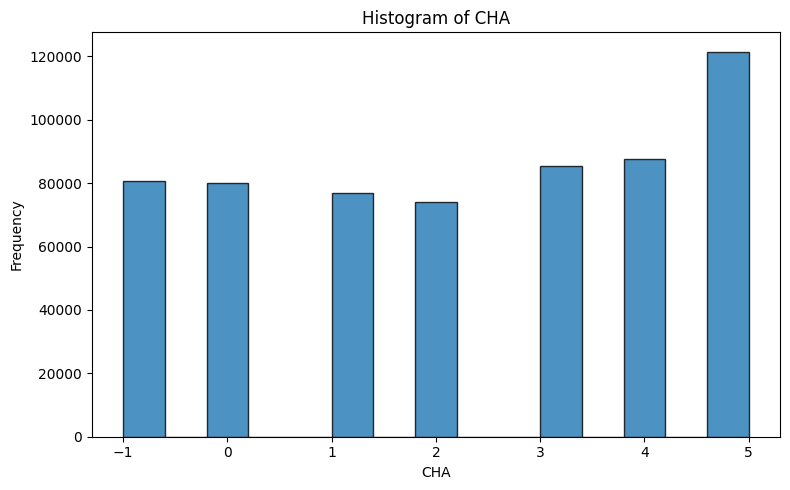

In [19]:
numeric_attrs = ["hp", "ac", "STR", "DEX", "CON", "INT", "WIS", "CHA"]
for attr in numeric_attrs:
    plt.figure(figsize=(8, 5))
    plt.hist(heros_df[attr].dropna(), bins=15, edgecolor='black', alpha=0.8)
    plt.title(f"Histogram of {attr}")
    plt.xlabel(attr)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

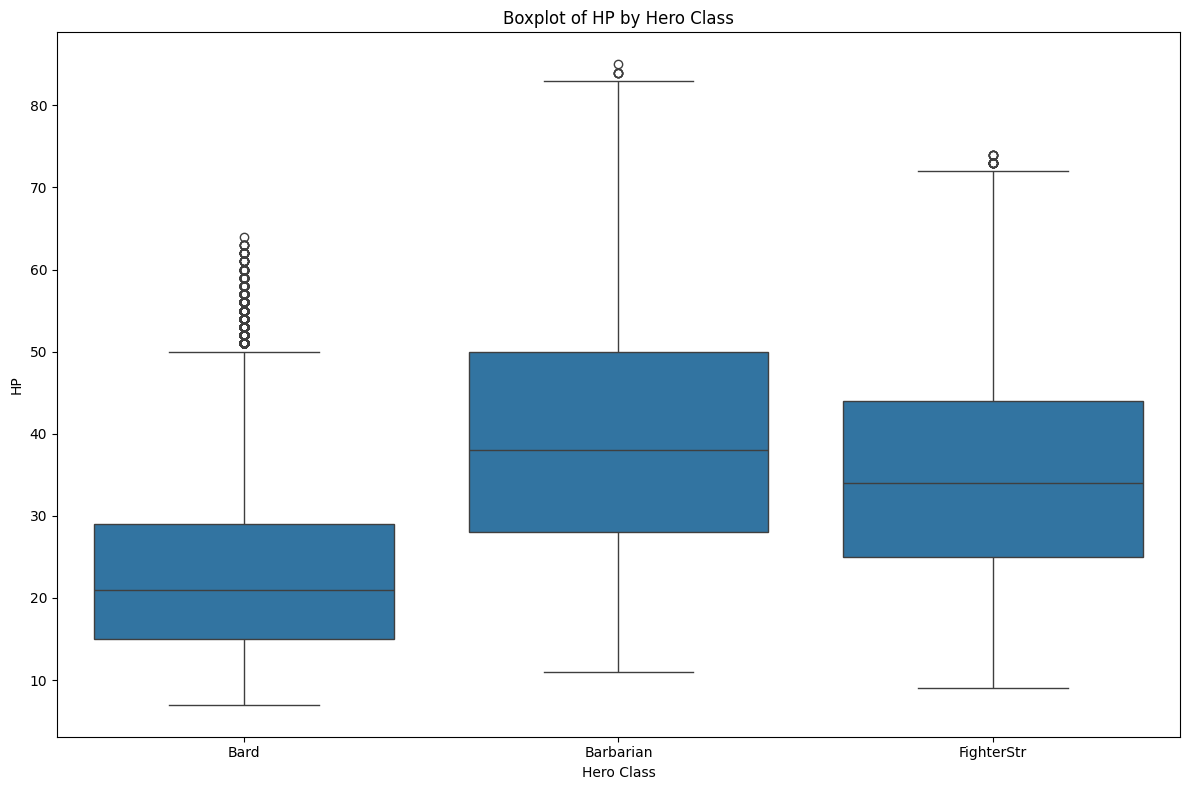

In [20]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=heros_df, x="class", y="hp")
plt.title("Boxplot of HP by Hero Class")
plt.xlabel("Hero Class")
plt.ylabel("HP")
plt.tight_layout()
plt.show()

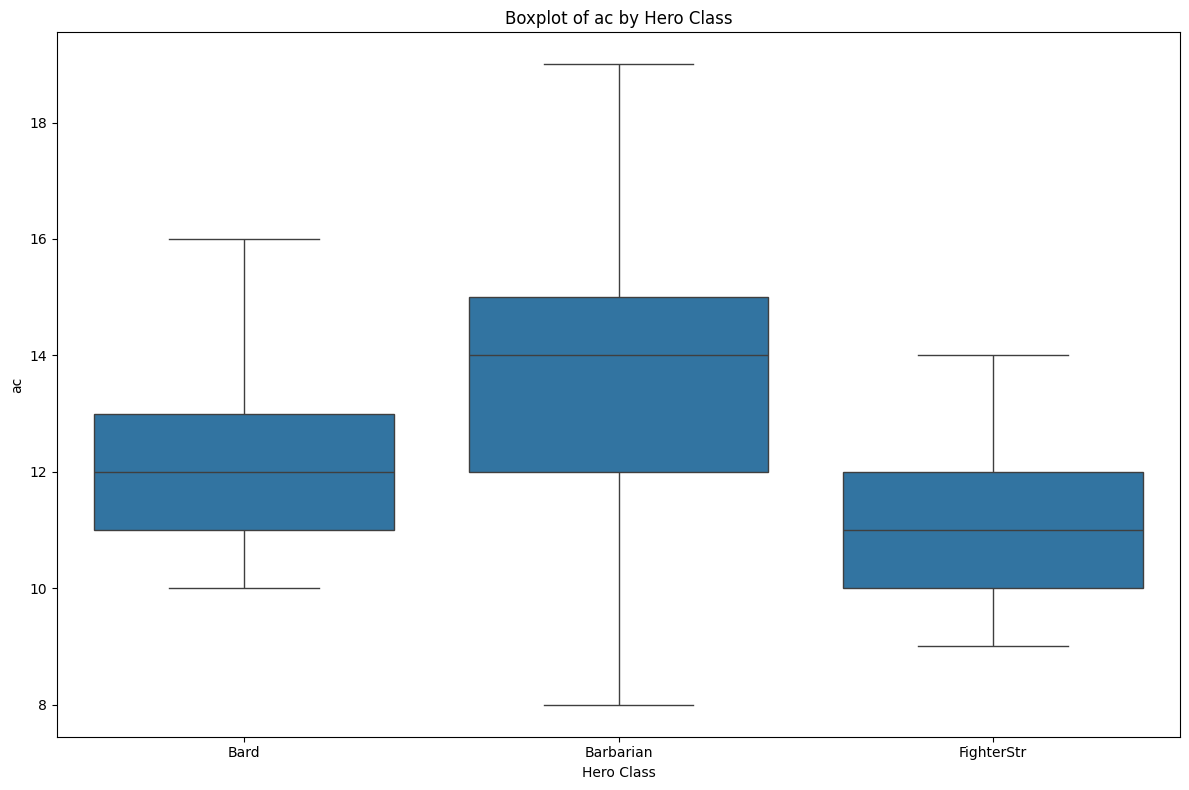

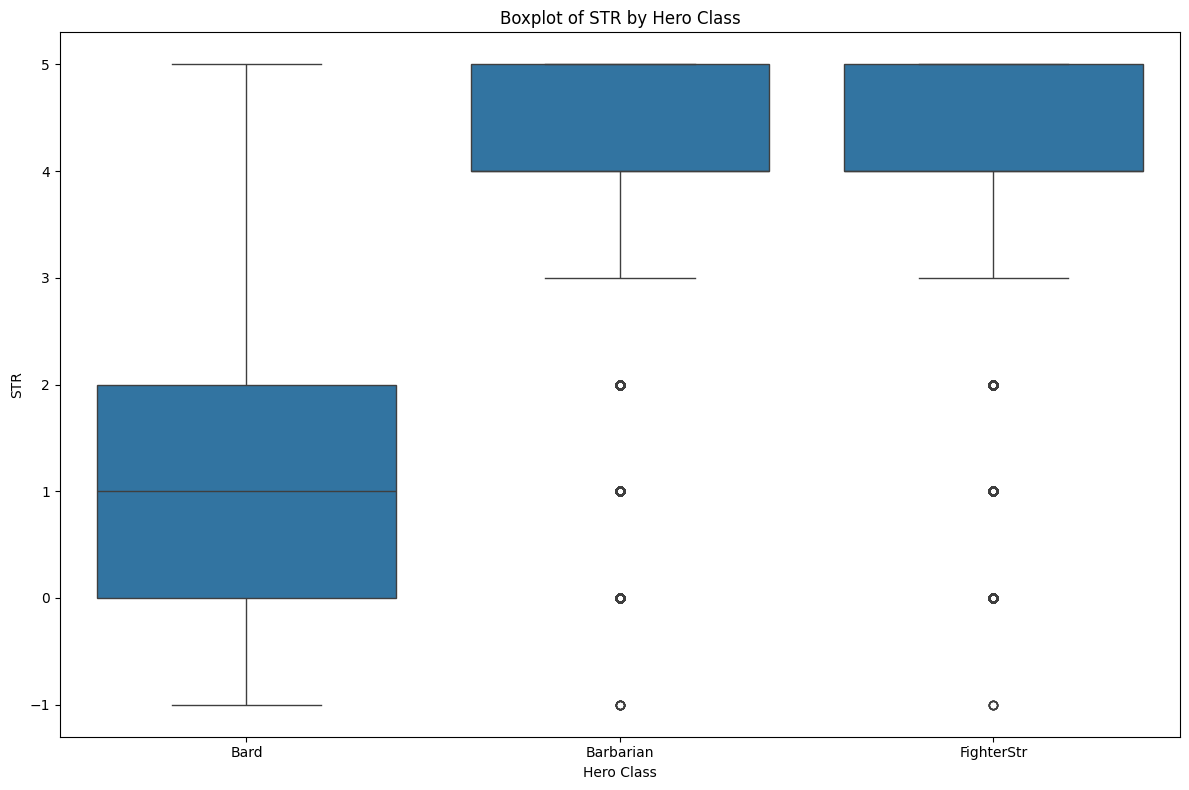

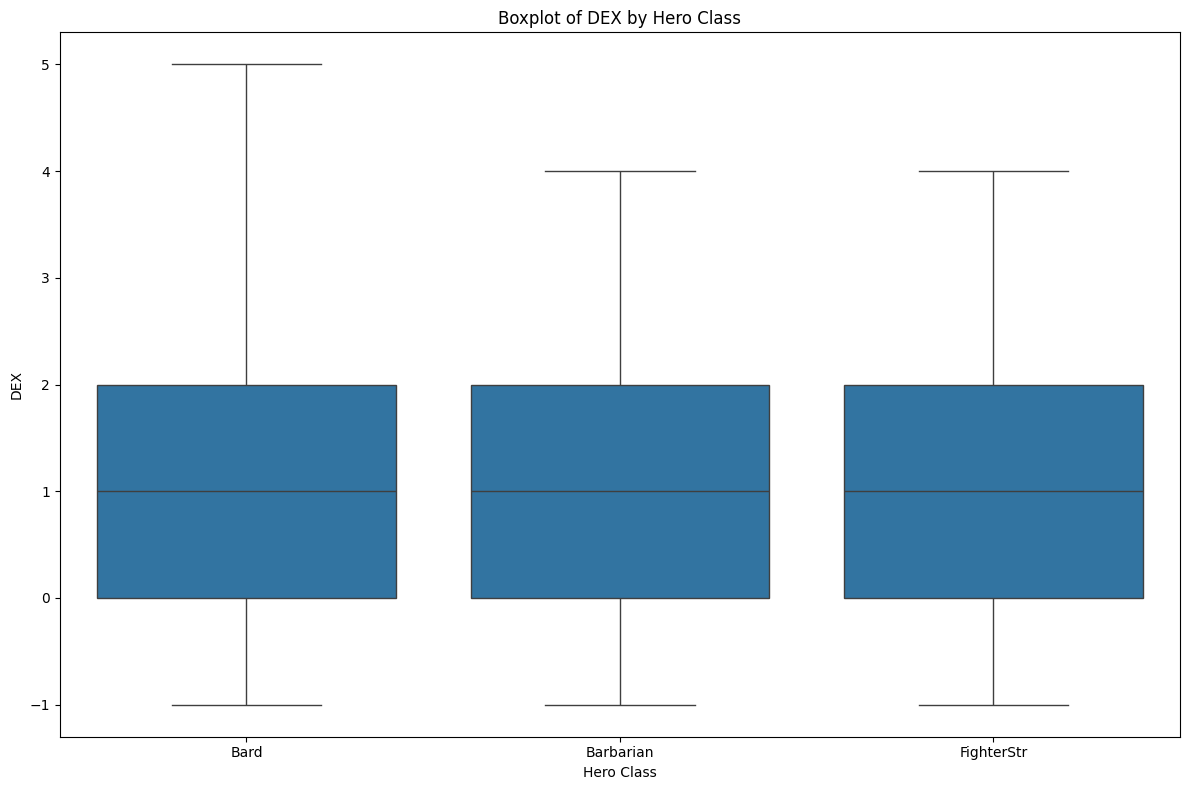

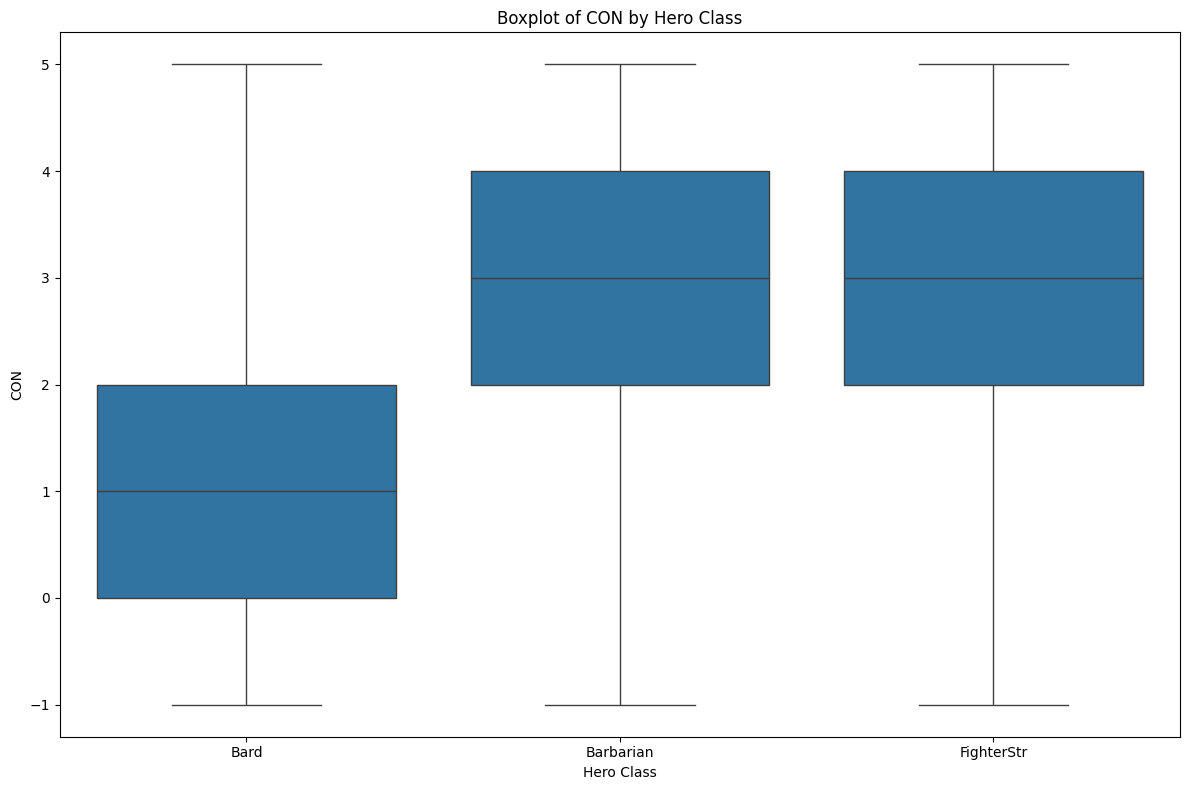

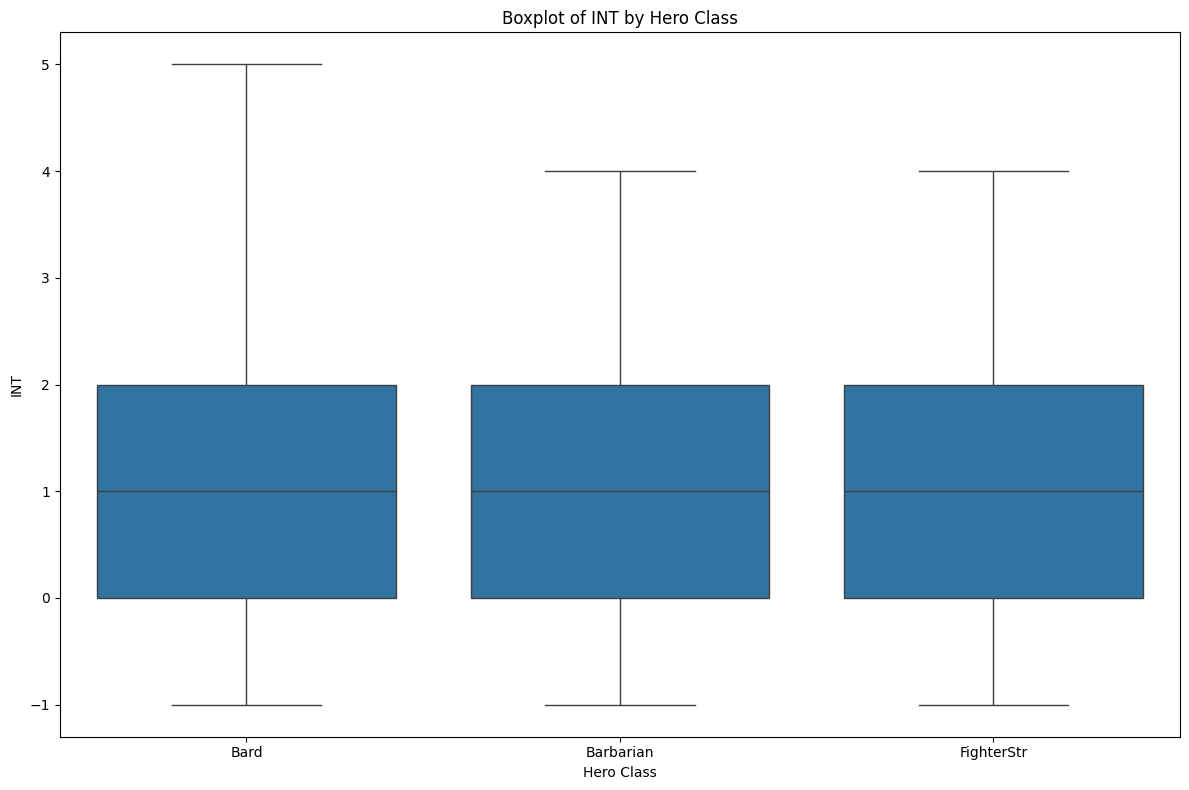

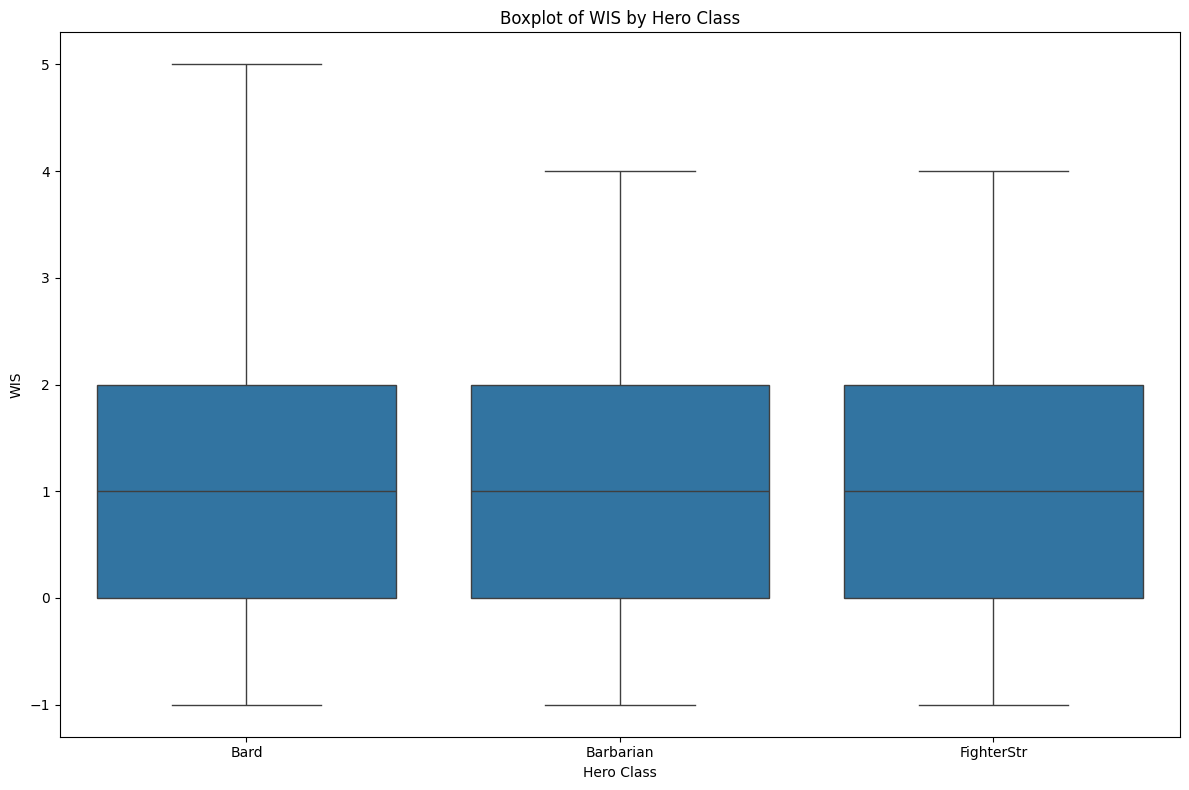

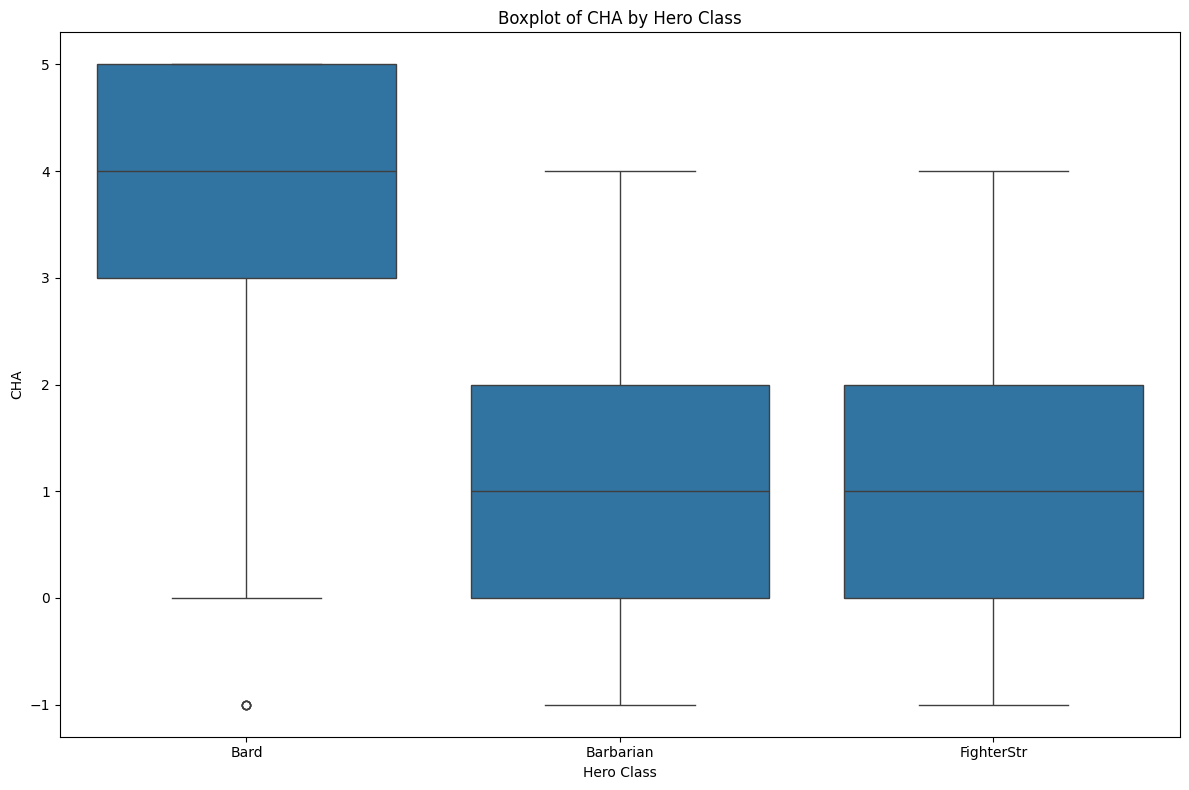

In [21]:
for attr in numeric_attrs[1:]:  # Exclude HP, already plotted
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=heros_df, x="class", y=attr)
    plt.title(f"Boxplot of {attr} by Hero Class")
    plt.xlabel("Hero Class")
    plt.ylabel(attr)
    plt.tight_layout()
    plt.show()

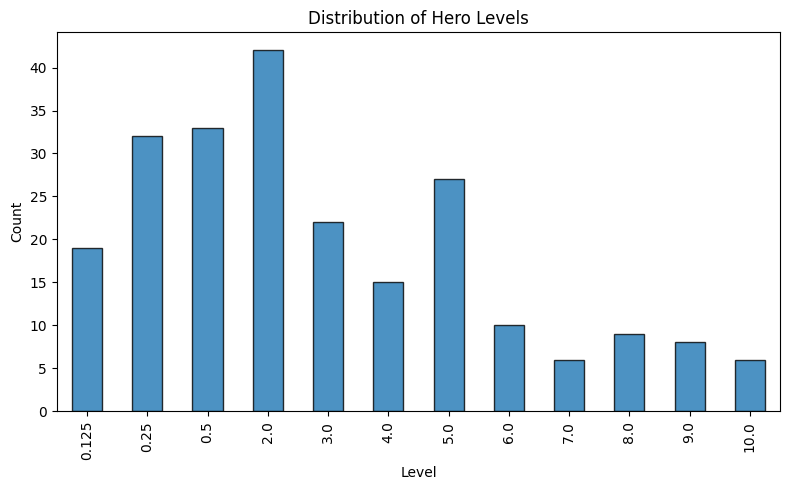

In [ ]:
plt.figure(figsize=(8, 5))
level_counts = monsters_df["cr"].value_counts().sort_index()
level_counts.plot(kind="bar", edgecolor='black', alpha=0.8)
plt.title("Distribution of Monsters CR")
plt.xlabel("Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


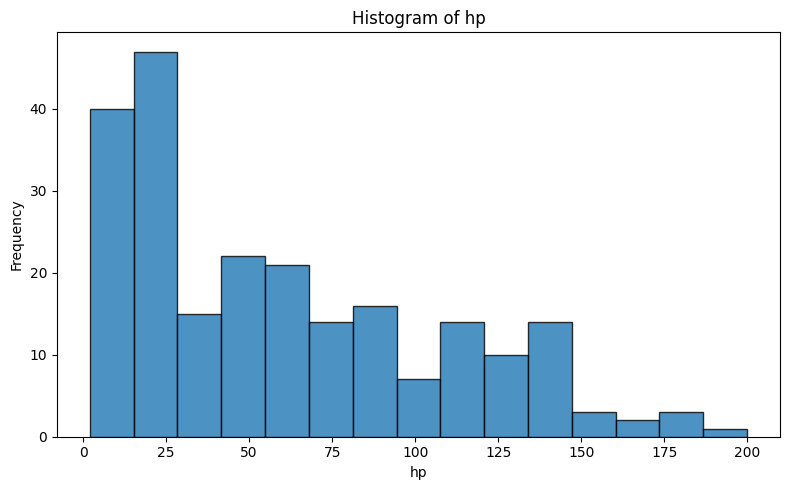

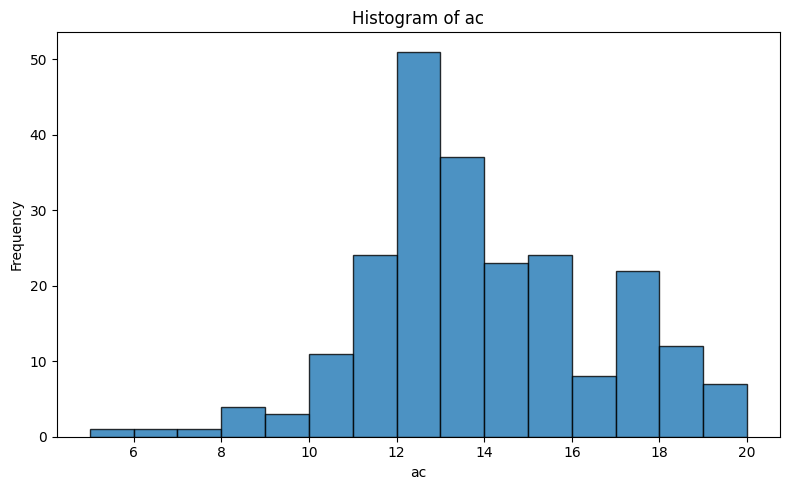

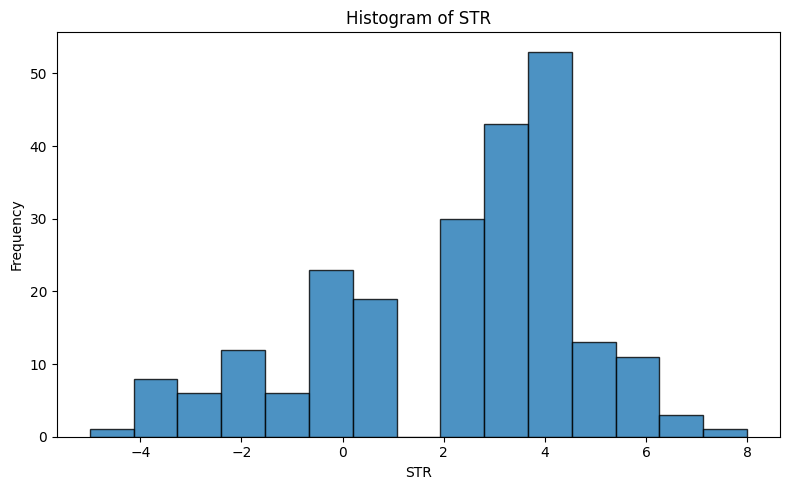

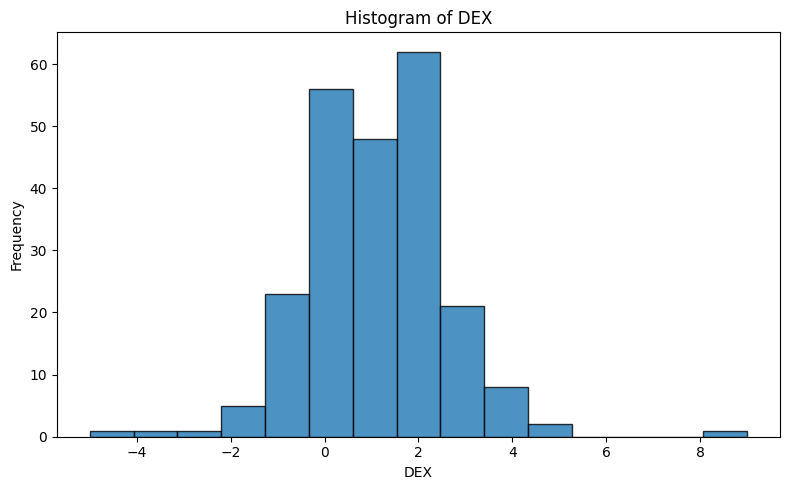

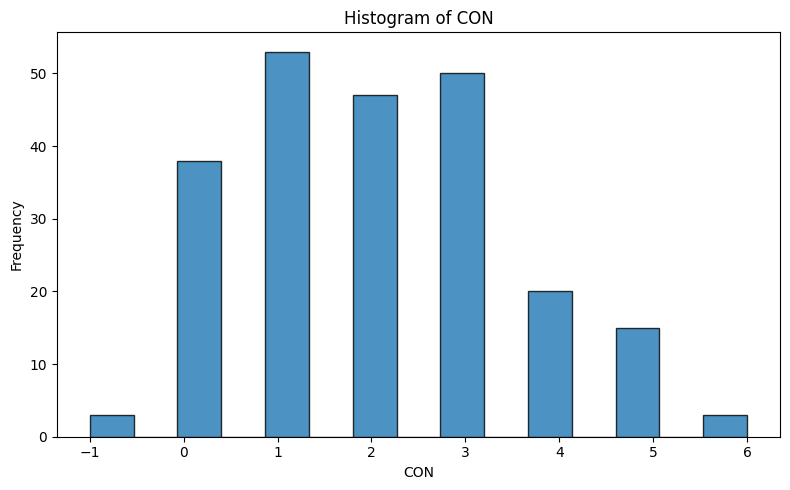

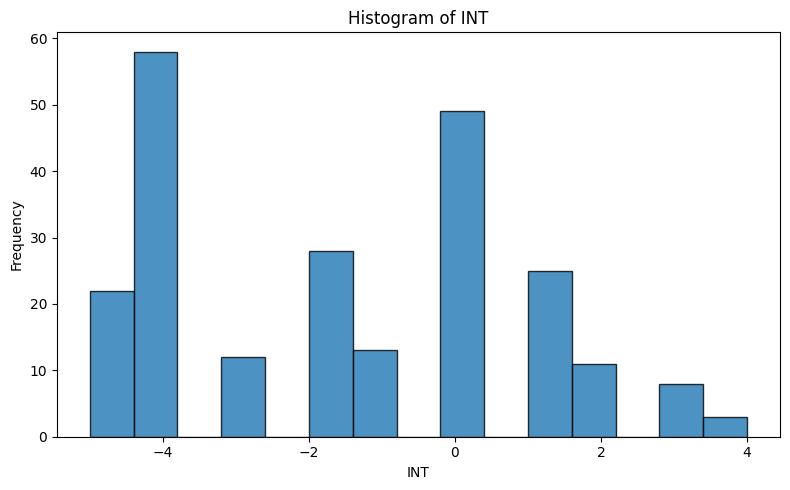

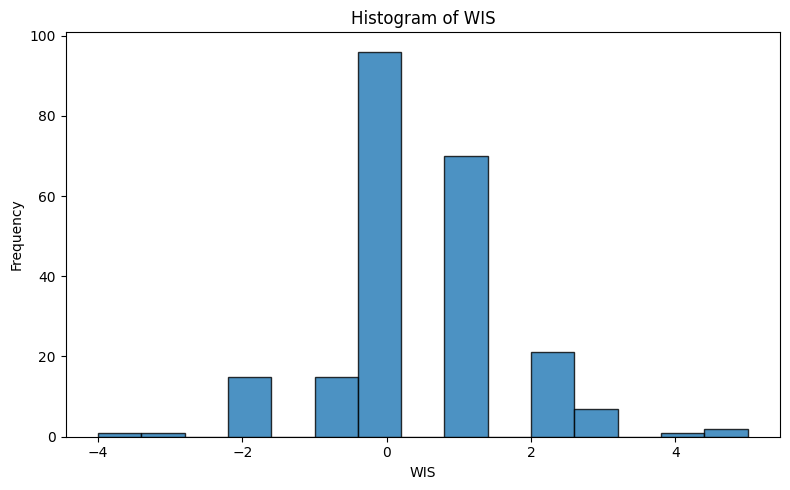

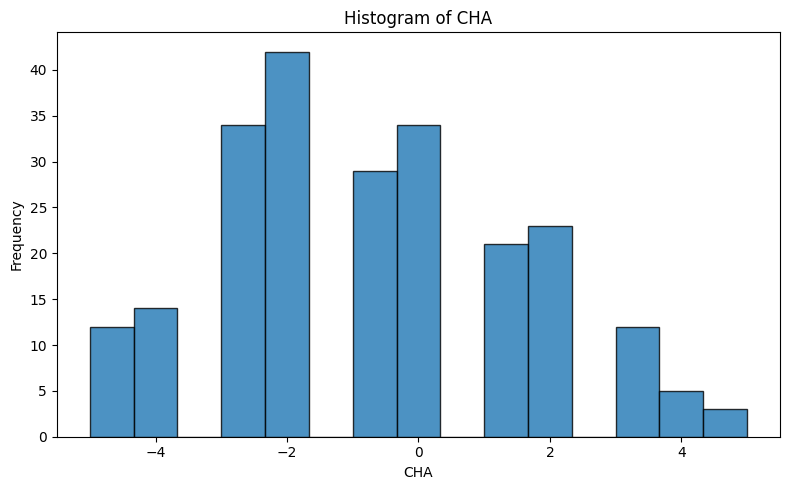

In [ ]:
numeric_attrs = ["hp", "ac", "STR", "DEX", "CON", "INT", "WIS", "CHA"]
for attr in numeric_attrs:
    plt.figure(figsize=(8, 5))
    plt.hist(monsters_df[attr].dropna(), bins=15, edgecolor='black', alpha=0.8)
    plt.title(f"Histogram of {attr}")
    plt.xlabel(attr)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

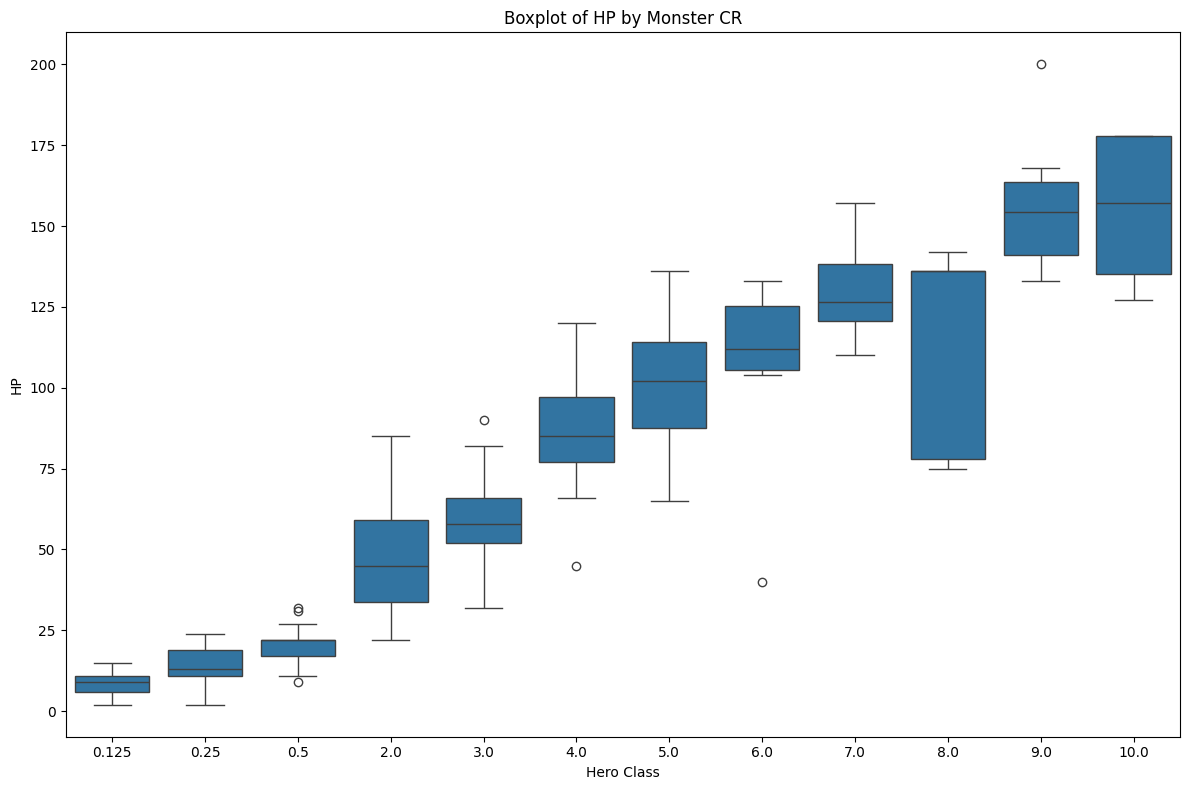

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=monsters_df, x="cr", y="hp")
plt.title("Boxplot of HP by Monster CR")
plt.xlabel("Hero Class")
plt.ylabel("HP")
plt.tight_layout()
plt.show()

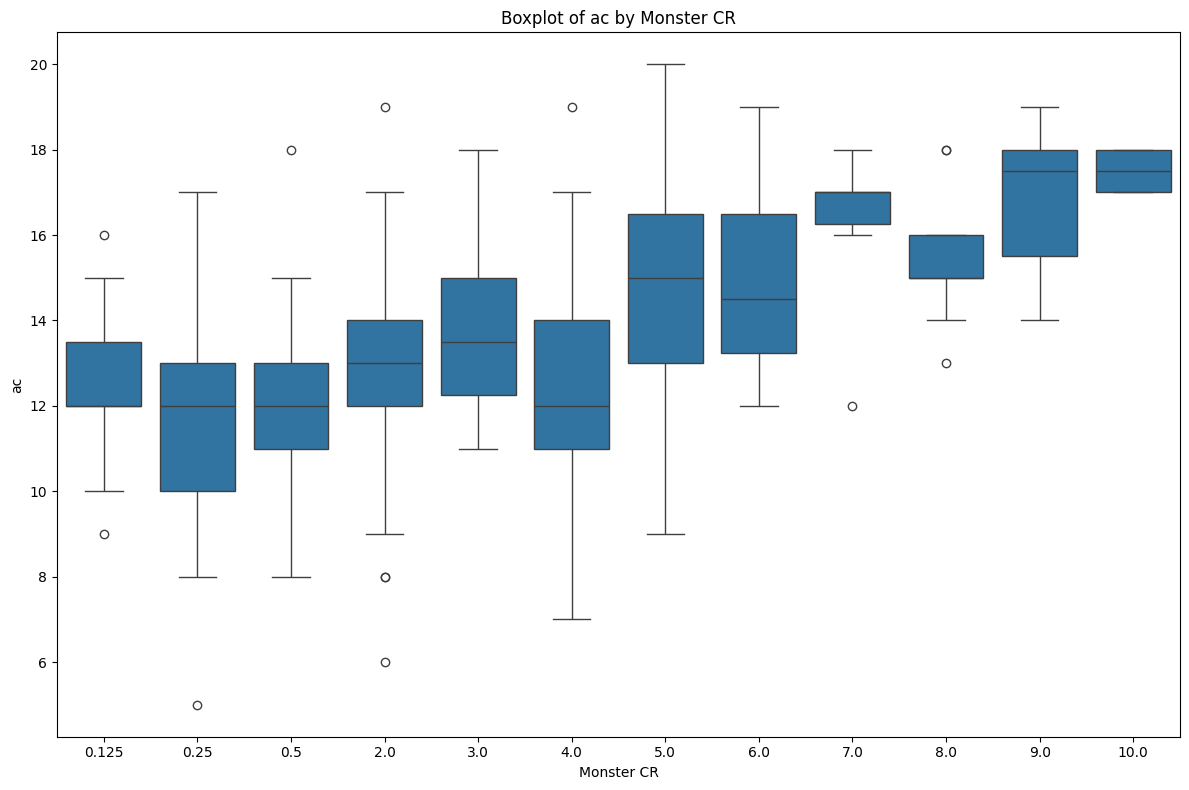

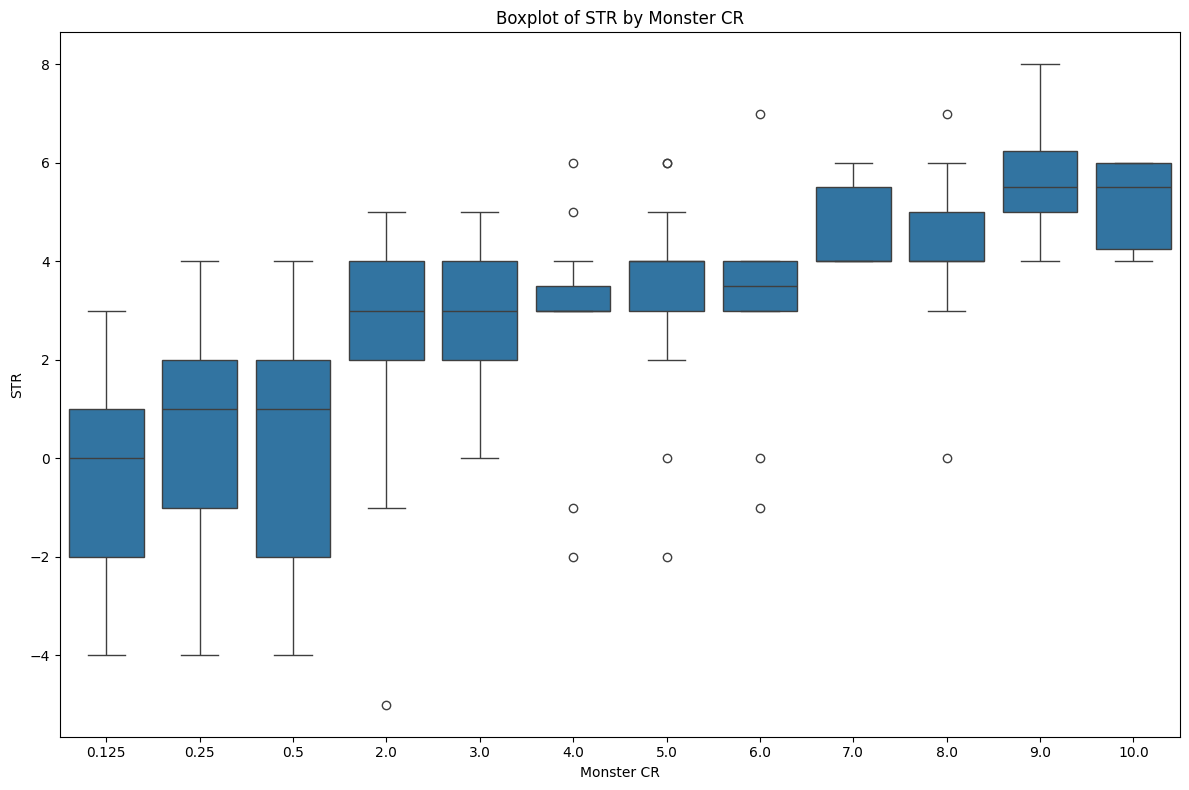

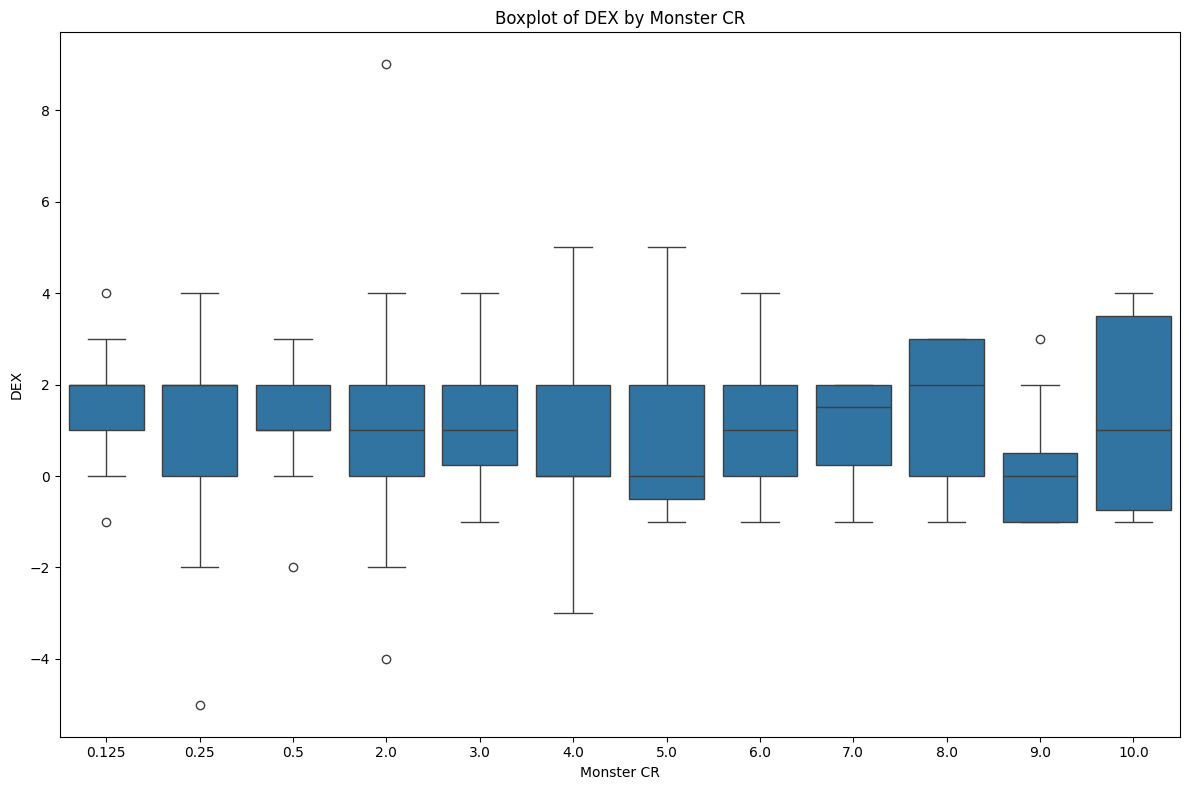

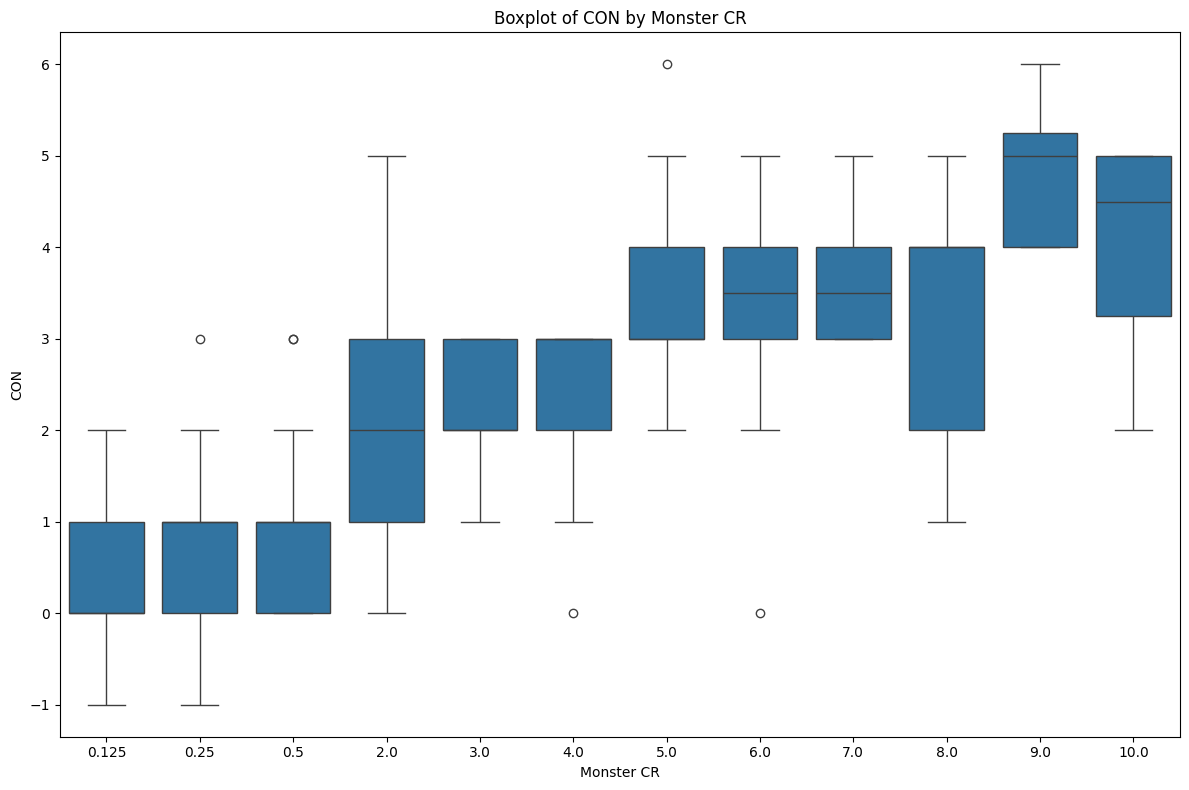

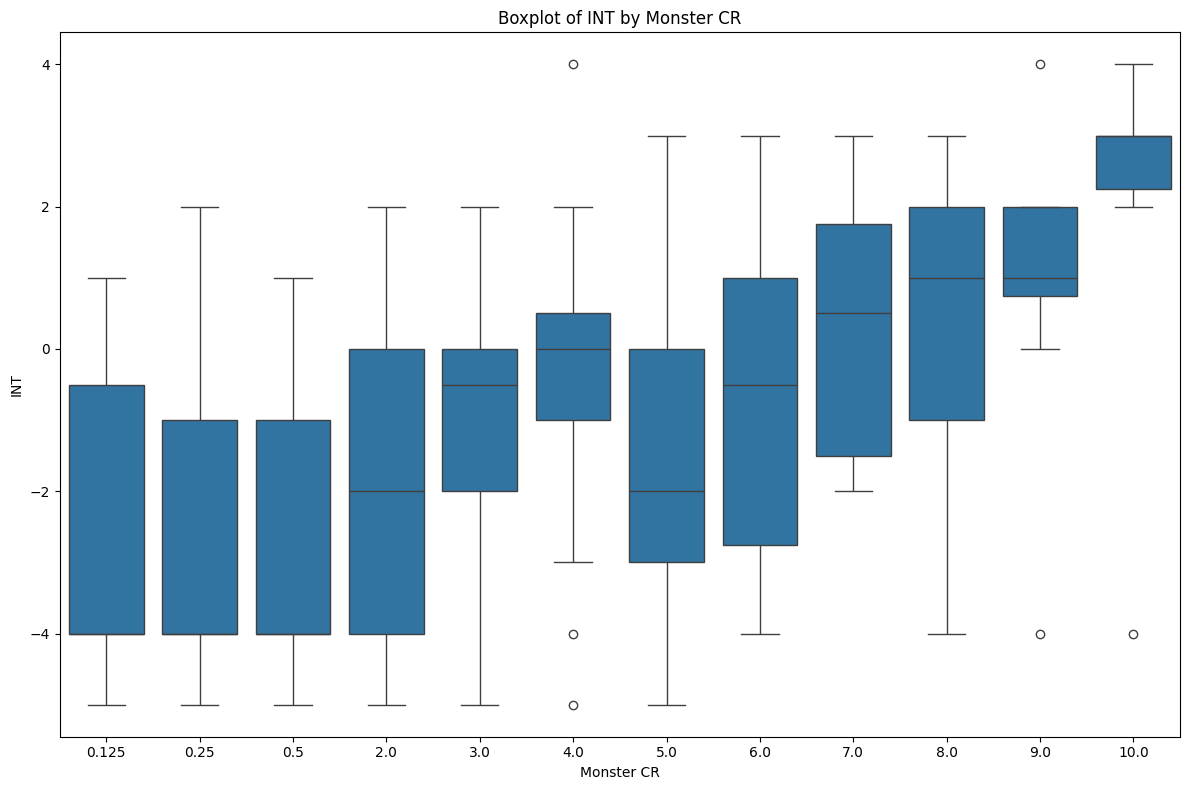

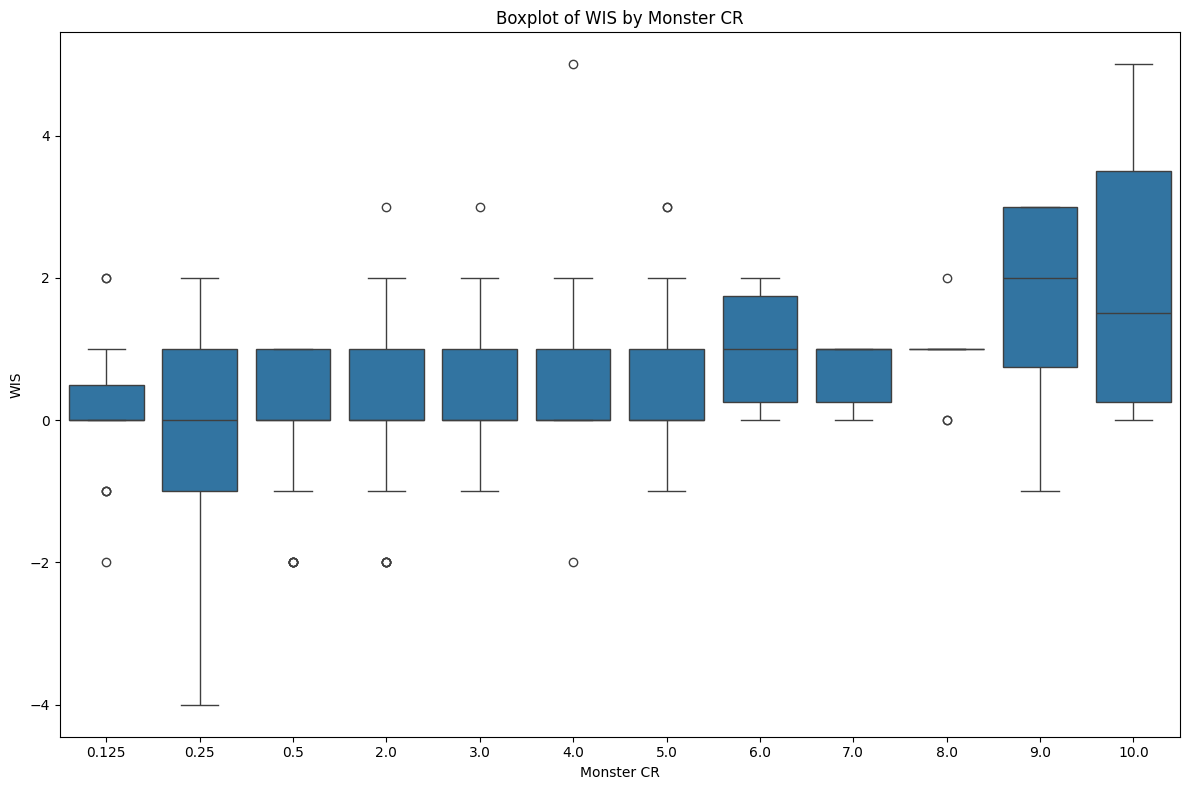

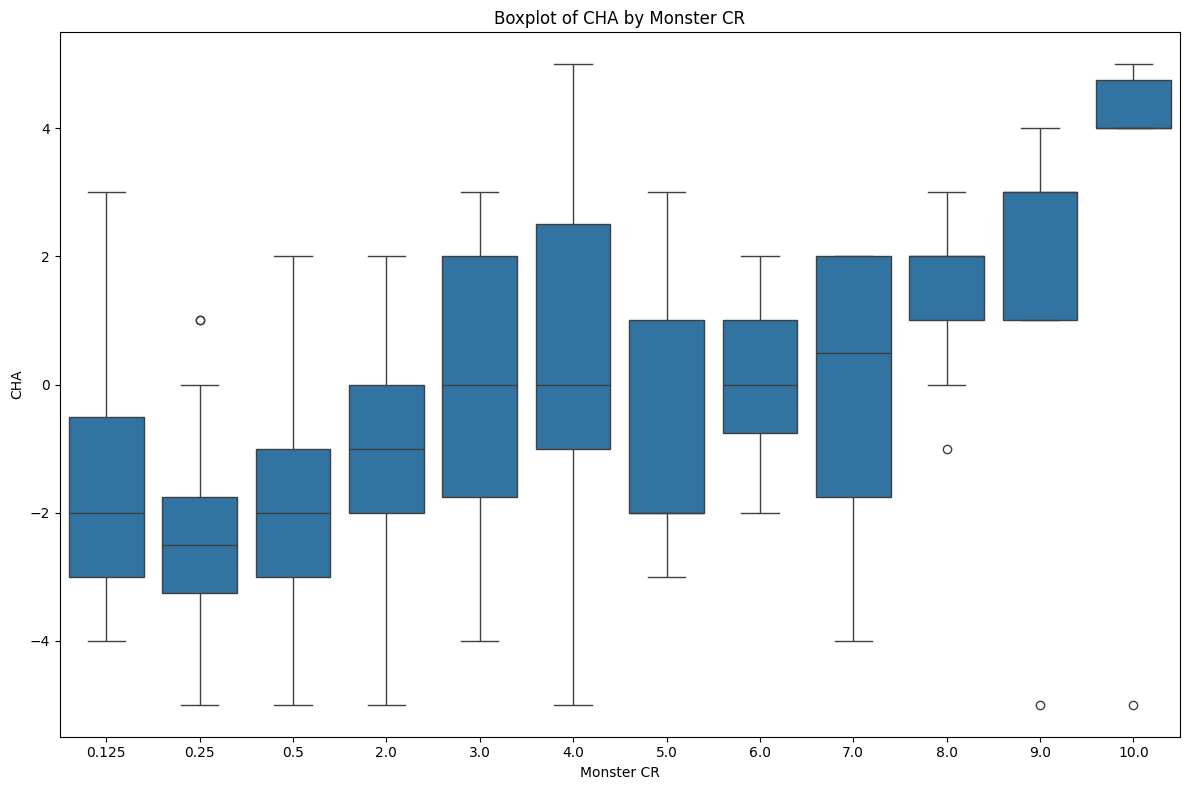

In [25]:
for attr in numeric_attrs[1:]:  # Exclude HP, already plotted
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=monsters_df, x="cr", y=attr)
    plt.title(f"Boxplot of {attr} by Monster CR")
    plt.xlabel("Monster CR")
    plt.ylabel(attr)
    plt.tight_layout()
    plt.show()

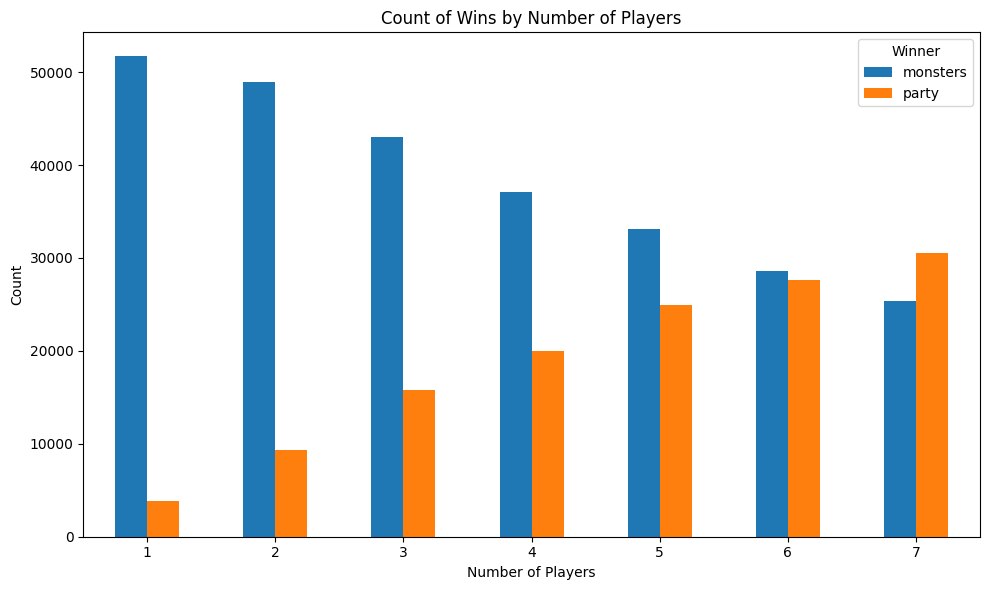

In [26]:
# Agrupar por número de jugadores y quién ganó, y contar ocurrencias
grouped_df = df.groupby(["num_players", "winner"]).size().reset_index(name="count")

# Pivotear la tabla para tener una columna por valor único de "winner"
pivot_pd = grouped_df.pivot(
    index="num_players",
    columns="winner",
    values="count"
).fillna(0)

# Asegurar orden por número de jugadores
pivot_pd = pivot_pd.sort_index()

# Gráfico de barras agrupadas
ax = pivot_pd.plot(kind='bar', figsize=(10, 6))
ax.set_title("Count of Wins by Number of Players")
ax.set_xlabel("Number of Players")
ax.set_ylabel("Count")
ax.legend(title="Winner")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


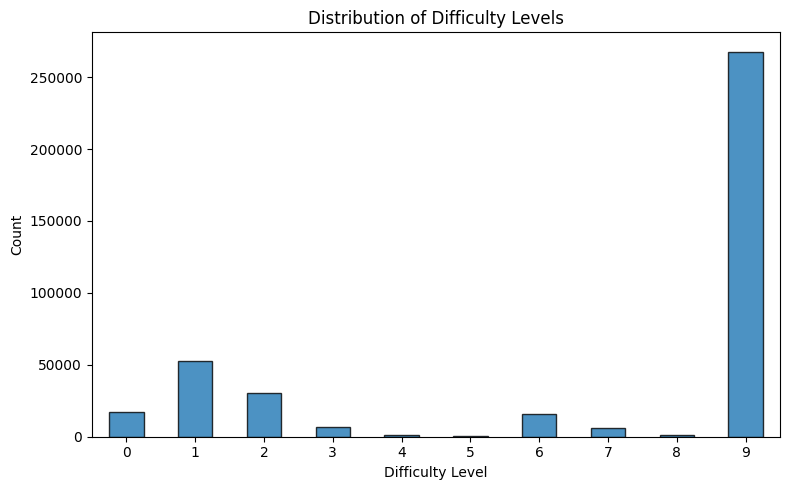

In [33]:
plt.figure(figsize=(8, 5))
df["difficulty"].value_counts().sort_index().plot(kind="bar", edgecolor="black", alpha=0.8)
plt.title("Distribution of Difficulty Levels")
plt.xlabel("Difficulty Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [29]:
shapiro_test(monsters_df, numeric_attrs, "cr")

,attribute,cr,n,shapiro_stat,p_value,normal
0,hp,8.000,9,0.734068,0.003541,False
1,hp,6.000,10,0.729879,0.002031,False
2,hp,10.000,6,0.753329,0.021468,False
3,hp,3.000,22,0.937071,0.172152,True
4,hp,5.000,27,0.948492,0.197015,True
...,...,...,...,...,...,...
91,CHA,7.000,6,0.838008,0.125492,True
92,CHA,2.000,42,0.958652,0.132131,True
93,CHA,0.250,32,0.924465,0.027526,False
94,CHA,0.125,19,0.886004,0.027354,False


In [30]:
shapiro_test(heros_df, numeric_attrs, "level")

,attribute,level,n,shapiro_stat,p_value,normal
0,hp,3,5000,0.989658,1.112685e-18,False
1,hp,5,5000,0.989638,1.063733e-18,False
2,hp,1,5000,0.938480,2.186059e-41,False
3,hp,2,5000,0.988273,5.683870e-20,False
4,hp,4,5000,0.989828,1.634544e-18,False
5,ac,3,5000,0.953319,2.963892e-37,False
6,ac,5,5000,0.947994,7.614572e-39,False
7,ac,1,5000,0.955314,1.273695e-36,False
8,ac,2,5000,0.957842,8.718516e-36,False
9,ac,4,5000,0.949681,2.349187e-38,False
